In [ ]:
#En este projecto se realiza la clasificación de causas probables para diagnosticos de CancerCervical en un conjunto de Datos de la UCI
# Con muestras de 'https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification/download?datasetVersionNumber=6'

In [38]:
#Importamos Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [62]:
#Lectura de Archivo 
#Observamos que hay que cambiar '?' null y despues volver numeros todo.


df=pd.read_csv('kag_risk_factors_cervical_cancer.csv')
df=df.replace('?',np.NaN)

In [63]:
df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [64]:
#Limpieza de datos

#Observamos que todos los valores son cadenas entonces hay que pasarlas a numeros, ademas, se observa que no hay nulos pero existen '?' los cuales sustituir

for column in df.columns: 
  df[column]=df[column].apply(lambda x:float(x))

#df = df.astype(object).replace(np.nan, 'None')

In [54]:
#Analisis de datos


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    object 
 2   First sexual intercourse            858 non-null    object 
 3   Num of pregnancies                  858 non-null    object 
 4   Smokes                              858 non-null    object 
 5   Smokes (years)                      858 non-null    object 
 6   Smokes (packs/year)                 858 non-null    object 
 7   Hormonal Contraceptives             858 non-null    object 
 8   Hormonal Contraceptives (years)     858 non-null    object 
 9   IUD                                 858 non-null    object 
 10  IUD (years)                         858 non-null    object 
 11  STDs                                858 non-n

In [65]:
df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, ' Valores faltantes en los datos')

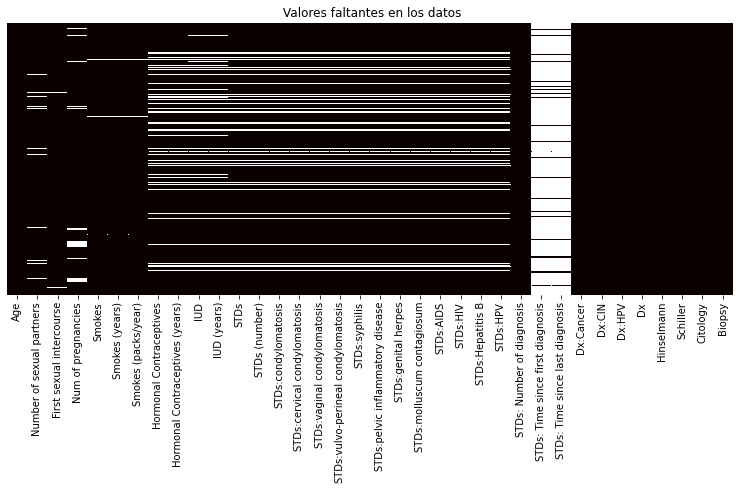

In [66]:
#Observamos valores faltantes en ambos conjuntos de datos 

plt.figure(figsize=(13,5))
sns.heatmap(df.isnull(),cbar= False, cmap='hot',yticklabels = False)
plt.title(' Valores faltantes en los datos')

In [73]:
#remplazamos faltantes con el promedio ya que no tenemos una mejor cualidad
for column in df.columns:
  df[column].fillna(df[column].mean(),inplace=True)

Text(0.5, 1.0, ' Valores faltantes en los datos')

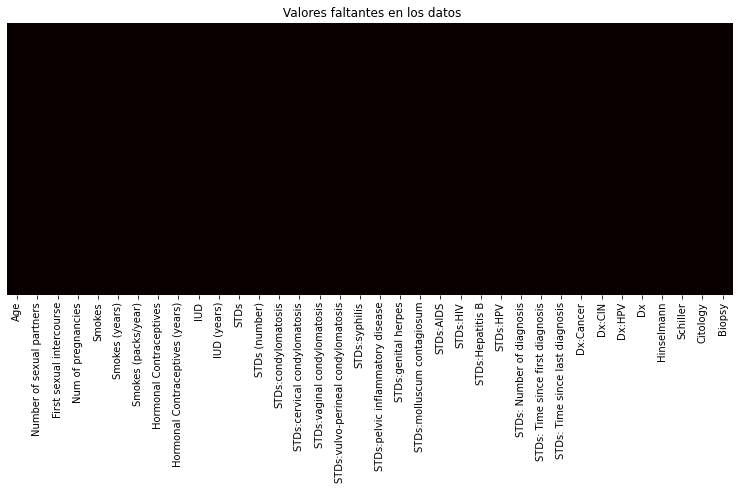

In [89]:

plt.figure(figsize=(13,5))
sns.heatmap(df.isnull(),cbar= False, cmap='hot',yticklabels = False)
plt.title(' Valores faltantes en los datos')

In [77]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

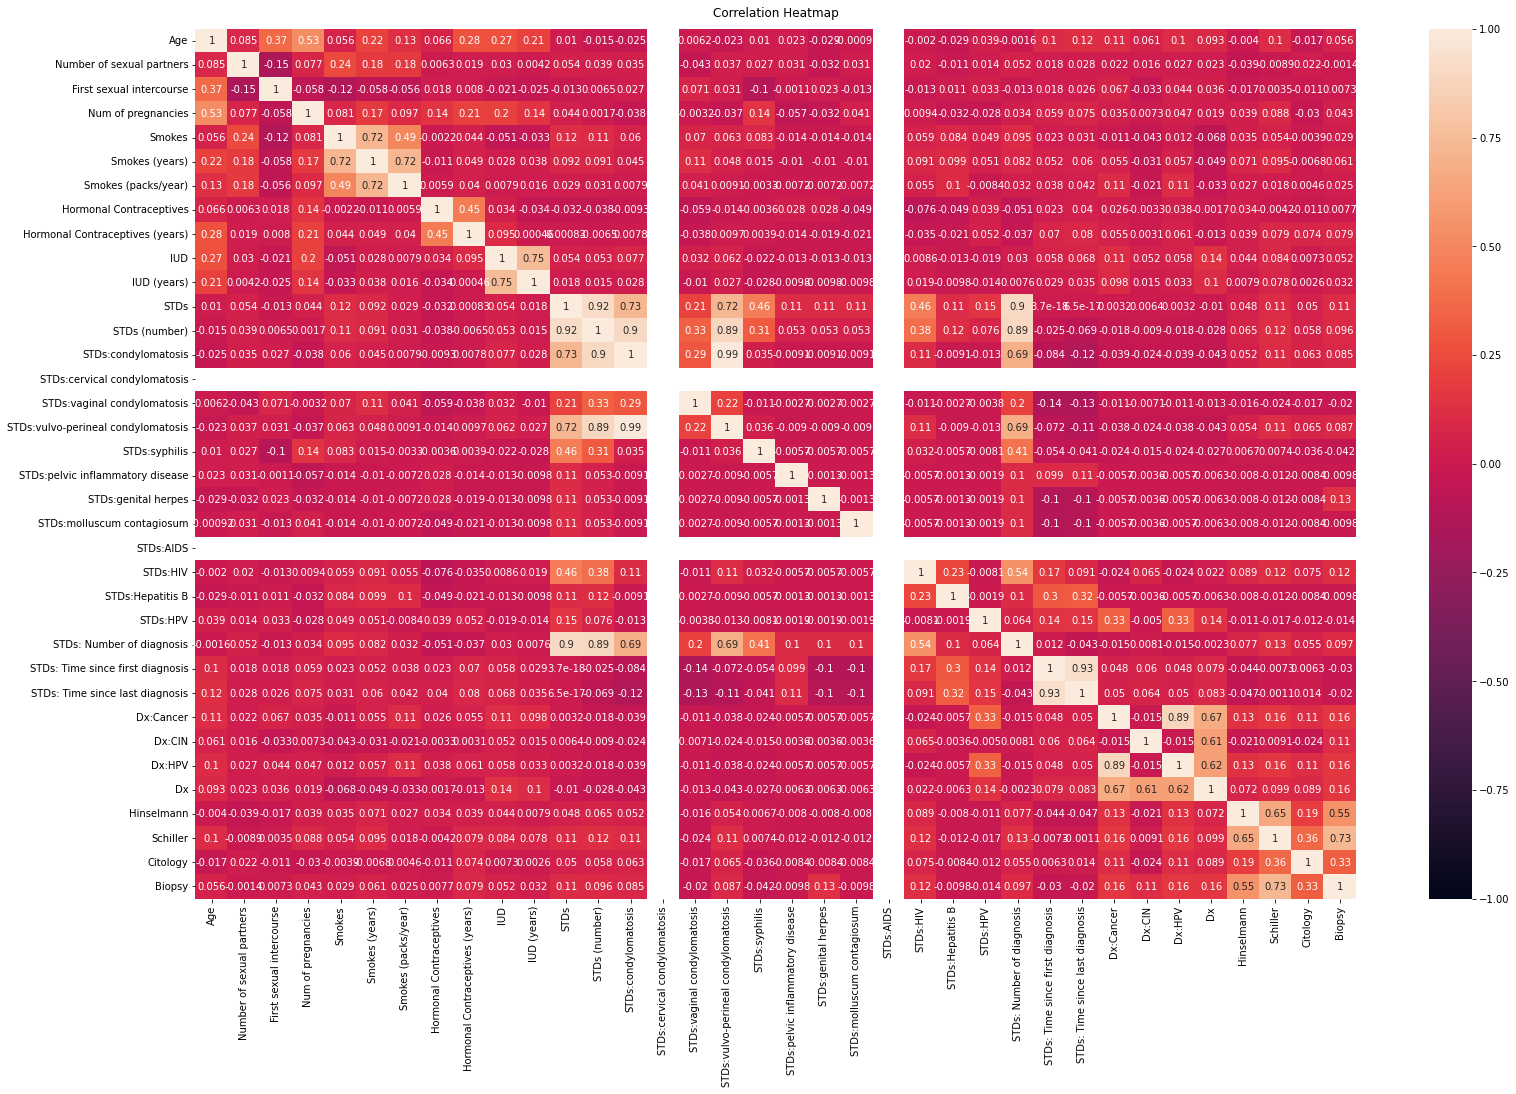

In [88]:
plt.figure(figsize=(26, 16))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state= 55, stratify = Y)  


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

score_rf=cross_val_score(clf,x_train, y_train,cv=10)
print(score_rf)
print('Avg :',np.average(score_rf))

[0.97101449 0.88405797 0.97101449 0.94202899 0.91304348 0.91304348
 0.95588235 0.94117647 0.95588235 0.95588235]
Avg : 0.9403026427962488


In [81]:
Tree = DecisionTreeClassifier( splitter='best')
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [82]:
predic=Tree.predict(x_test)

In [86]:
print(classification_report(predic,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       165
         1.0       0.36      0.57      0.44         7

    accuracy                           0.94       172
   macro avg       0.67      0.76      0.71       172
weighted avg       0.96      0.94      0.95       172



In [83]:
pd.crosstab(y_test, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,158,3,161
1.0,7,4,11
All,165,7,172


In [109]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=10)

In [110]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=10)

In [111]:
predic = GBC.predict(x_test)

In [112]:
print(classification_report(predic,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       164
         1.0       0.64      0.88      0.74         8

    accuracy                           0.97       172
   macro avg       0.82      0.93      0.86       172
weighted avg       0.98      0.97      0.97       172



In [113]:
pd.crosstab(y_test, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,160,1,161
1.0,4,7,11
All,164,8,172
